**Feature Importance** - Feature importance methods assign scores to each feature in a dataset, indicating how much each feature contributes to the model's ability to make accurate predictions.

**PCA** - Principle Component Analysis is dimensionality reduction technique that helps in extracting only useful features from datasets by minizing information loss. This helps in model execution as ML model only have those features that impact labels.


**y** - target numerical variable. ( e.g. Grosse (XS, S, M, L, XL, XXL) )


**x**  - numerical data without y, encoded by labelencoder








In [1]:
# install the needed libraries
pip install matplotlib plotly scikit-learn numpy


In [2]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import math
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 191)
%matplotlib inline
from pandas import read_excel

import os
import scipy.ndimage
import scipy.stats
import plotly.express as px
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, ensemble, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

import xgboost as xgb
import seaborn as sns
import numpy as np
np.bool = np.bool_


In [5]:
# importing or loading the dataset
y_sheet = 'List' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'DE_Mode_1.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = y_sheet)

In [6]:
# revise that all columns are numerical
print (df.dtypes)

Mitarbeiter 2025             int64
Grosse                      object
Marke                       object
Gegründet                    int64
Stadt                       object
Land                        object
Umsatz 2024                  int64
Umsatz per Mitarbeiter     float64
Filialen                     int64
Mitarbeiter per Filiale    float64
CEO 2025                    object
Website                     object
Unnamed: 12                 object
dtype: object


In [7]:
# convert (encode) object type to numerical
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Grosse'] = labelencoder.fit_transform(df['Grosse']) #transform column
df['Marke'] = labelencoder.fit_transform(df['Marke']) #transform column
df['Stadt'] = labelencoder.fit_transform(df['Stadt']) #transform column
df['Land'] = labelencoder.fit_transform(df['Land']) #transform column
df['CEO 2025'] = labelencoder.fit_transform(df['CEO 2025']) #transform column
df['Website'] = labelencoder.fit_transform(df['Website']) #transform column

In [9]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 0:10].values # number of columns in dataset is 11
y = df.iloc[:, 1].values # target categorical column is e.g. the second one, Grosse

In [11]:
# Firma Grosse has 0 = XS, 1 = S, 2 = M, 3 = L, 4 = XL, 5 = XXL
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [12]:
# Splitting the X and Y into the
# Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Applying PCA function on training
# and testing set of X component
# we wish to have at the end only 2 PCA Grosse components, not 5 Grosse Components
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [17]:
# revise that we do not have any missing values in data file
np.count_nonzero(np.isnan(X_train))
np.count_nonzero(np.isnan(y_train))

0

In [18]:
# Fitting Logistic Regression To the training set

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred)

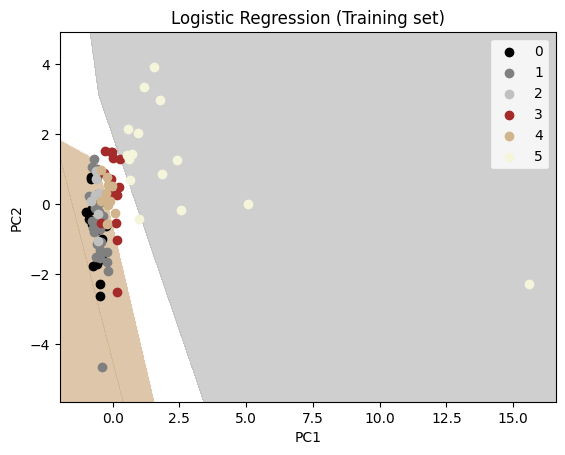

In [24]:
# TRAINING
# Predict training set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('tan', 'white', 'silver')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('black', 'grey','silver', 'brown', 'tan','beige'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

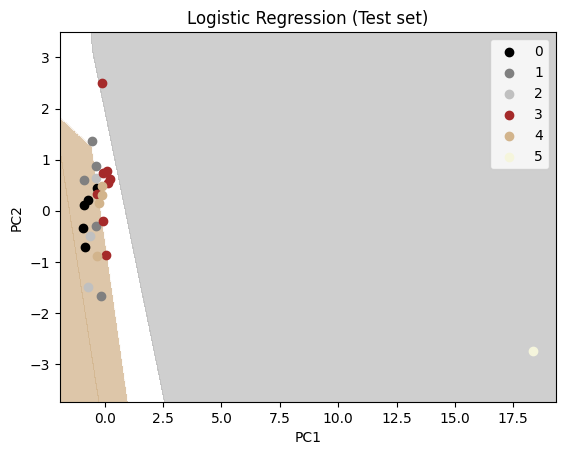

In [25]:
# TEST
# predict test set
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('tan', 'white', 'silver')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('black', 'grey','silver', 'brown', 'tan','beige'))(i), label=j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()

# show scatter plot
plt.show()

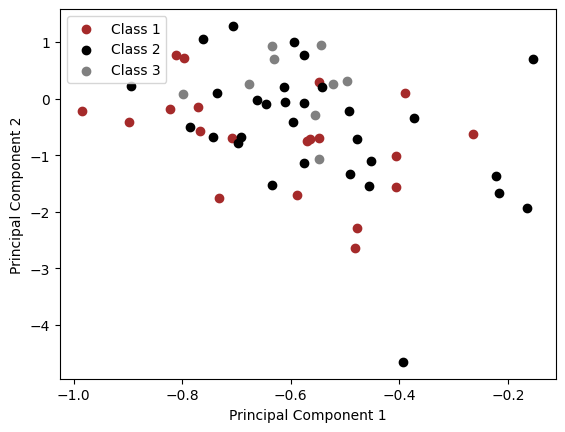

In [26]:
# plot the first two principal components with labels
colors = ['brown', 'black', 'grey']
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()